# **Credit Card Fraud Detection**
-By Shishir Agarwal

Detecting fraudulent transactions done on a credit card so that the customer doesn't have to pay for anything that they didn't purchase and the transaction can be stopped before it gets processed.

The project demonstrates the implementation of 4 different machine learning models on a dataset containing information about credit card transactions having 30 features, and one target value 'Class'
The models' main purpose is to predict if a Credit Card transaction is fraud or not, based upon the 30 attributes or features.
The 4 models are-
- Random Forest
- Logistic Regression
- Decision Trees
- Gradient Boosting Classifier

The accuracy and precision of all the models are compared and a bar graph is drawn to show how well an algorithm performs than others.

## **Data Set**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The data set is obtained from Kaggle

In [7]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [11]:
data = pd.read_csv(r'C:\Users\agarw\Desktop\Credit Card Detection\creditcard.csv')

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [14]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierrat=len(fraud)/ float(len(valid)) #ratio of fraud transactions to valid ones
print(outlierrat)
print('Fraud Cases:{}'.format(len(data[data['Class']==1])))
print('Valid Cases:{}'.format(len(data[data['Class']==0])))


0.0017304750013189597
Fraud Cases:492
Valid Cases:284315


There are about 0.17305% of fraud transactions from total transactions. Considering the high imbalance in the data, this situation can significantly affect the performance of a machine learning model in terms of false positives and false negatives.
False Positive Rate: This might increase because the model might overfit on the majority class (valid transactions) and mistakenly classify some valid transactions as fraudulent.
False Negative Rate: This is critical to monitor, as missing fraudulent transactions (false negatives) can have severe consequences. However, due to the imbalance, a model might become biased towards predicting the majority class, increasing the number of false negatives.

In [15]:
#Printing fraud amount data

print("Amount of the fraud transactions")
fraud.Amount.describe() #Describes the descriptive statistics for the data

Amount of the fraud transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
#Amount details for Normal Transactions
print("Amount details of Valid Txns")
valid.Amount.describe()

Amount details of Valid Txns


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We need to find the features that are most relevant for prediction, here we have seen that average money txn for fraud is more.
Let's use correlation matrix to find the correlation between the features

<function matplotlib.pyplot.show(close=None, block=None)>

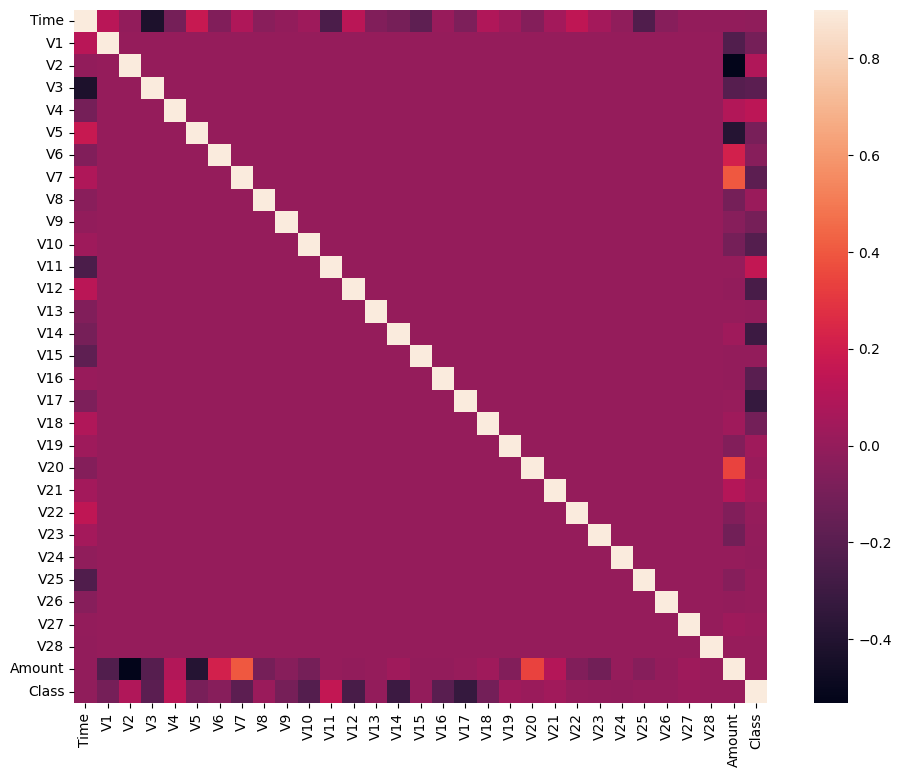

In [20]:
corrmatrix= data.corr()
fig= plt.figure(figsize=(12,9))
sns.heatmap(corrmatrix, vmax= .9, square=True)
plt.show

In [22]:
#Dividing the X and Y from the dataset
X= data.drop(['Class'], axis=1) #Removes the Class column from the data
Y= data["Class"]
print(X.shape)
print(Y.shape)

xData= X.values
yData= Y.values

(284807, 30)
(284807,)


Splitting the data into Test Sets and Training sets. Training sets help us to evaluate Model's performance

In [24]:
#Splitting the data into Test and Training sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(xData, yData, test_size=0.2, random_state=56)

# **Module 1: Random Forest Model**

We will use **Random Forest Model** to make the predictions using scikit learn

**1. Handling Imbalanced Data:**

Credit card fraud detection often involves highly imbalanced datasets, where fraudulent transactions are rare compared to legitimate ones. Random Forests are robust to this imbalance because:

Sampling Techniques: Random Forest uses bootstrap sampling to create multiple training subsets, which helps ensure that minority class examples (fraudulent transactions) are adequately represented in the training process.
Ensemble Learning: By aggregating the predictions from multiple decision trees, Random Forest can provide a balanced view and mitigate the bias towards the majority class.

**2. Feature Importance:**
Random Forest provides a measure of feature importance, which can help identify which features (e.g., transaction amount, location, time of day) are most indicative of fraud. This can be useful for both improving the model and gaining insights into the nature of fraudulent transactions.

**3. Non-linear Relationships:**
Random Forest can capture complex, non-linear relationships between features. Fraudulent behavior may not follow simple linear patterns, and the ability to model these complex interactions is crucial for accurate detection.

**4. Robustness to Noise:**
Random Forest is relatively robust to noise and outliers in the data. This is important for fraud detection, as fraudulent transactions can be anomalous and significantly different from regular transactions.

**5. Reduced Overfitting:**
The ensemble nature of Random Forest (averaging multiple trees) helps reduce overfitting. Individual decision trees might overfit to the training data, but by averaging the results of many trees, Random Forest generalizes better to unseen data.


In [25]:
#Building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Model creation
rfc= RandomForestClassifier()
rfc.fit(x_train, y_train)
#Predictions
y_pred= rfc.predict(x_test)

In [33]:
# Create a DataFrame to print y_test and y_pred side by side
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Reset index for proper alignment
results = results.reset_index(drop=True)

# Print the head of the results DataFrame
print(results.head())


   y_test  y_pred
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0


Let's check the evaluating parameters

In [67]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors= (y_pred!= y_test).sum()

print("Model: Random FOREST CLASSIFIER")
accrf= accuracy_score(y_test, y_pred)
print("Accuracy is {}".format(accrf))

precrf= precision_score(y_test, y_pred)
print("Precision is {}".format(precrf))

rec= recall_score(y_test, y_pred)
print("Recall is {}".format(rec))

f1= f1_score(y_test, y_pred)
print("The F1 Score is {}".format(f1))

MCC= matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient is {}".format(MCC))

Model: Random FOREST CLASSIFIER
Accuracy is 0.9995435553526912
Precision is 0.9438202247191011
Recall is 0.8
The F1 Score is 0.865979381443299
Matthews Correlation Coefficient is 0.8687219450256287


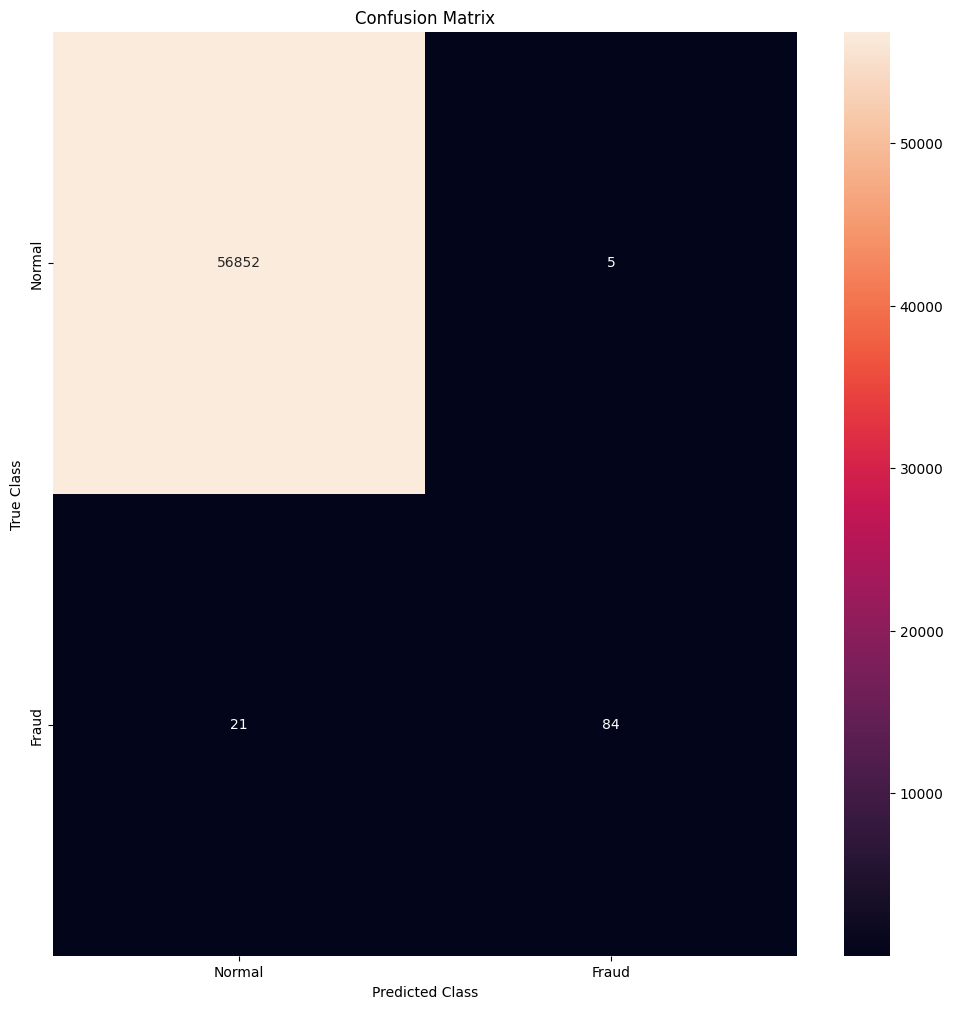

In [61]:
#Confusion Matrix
lbls= ['Normal', 'Fraud']
conf_matrix= confusion_matrix(y_test, y_pred)
plt.figure(figsize= (12,12))
sns.heatmap(conf_matrix, xticklabels=lbls, yticklabels=lbls, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# **Model 2: Logistic Regression**
**1. Binary Classification**
Credit card fraud detection is inherently a binary classification problem where the goal is to classify transactions into two categories: fraudulent or non-fraudulent. Logistic Regression is well-suited for binary classification tasks because it models the probability of a binary outcome based on one or more predictor variables.

**2. Interpretability**
Logistic Regression is a linear model that provides coefficients for each feature. These coefficients can be used to understand the impact of each feature on the likelihood of fraud. This interpretability is crucial in financial applications where understanding the factors influencing fraud can be valuable for decision-making and compliance.

**3. Handling Imbalanced Datasets**
Credit card fraud detection often involves imbalanced datasets where fraudulent transactions are much rarer than non-fraudulent ones. Logistic Regression can handle class imbalance by adjusting the class weights or by using techniques like resampling or synthetic data generation. The class_weight='balanced' parameter in scikit-learn’s Logistic Regression helps mitigate this issue by giving more importance to the minority class.
Logistic Regression Model can be used with or without scaling.

However, upon running the model and comparing the accuracy, it is found that the model is more accurate without balancing the dataset

### **Why Scaling is important-**

**1. Convergence of Gradient Descent:**
Logistic regression often uses gradient-based optimization methods to find the best-fitting model. If the features are on different scales, the gradient descent algorithm may struggle to converge. Scaling the features helps ensure that the algorithm converges faster and more reliably.

**2. Regularization:**
Regularization techniques like L1 (Lasso) and L2 (Ridge) penalize large coefficients to prevent overfitting. If the features are not scaled, the regularization might disproportionately penalize features with larger scales, leading to suboptimal model performance.

**3. Interpretability and Comparison:**
When features are on a similar scale, the coefficients of the logistic regression model can be more easily compared to understand the relative importance of each feature. This can be particularly useful in applications like credit card fraud detection, where interpretability can be important for understanding the factors that contribute to fraudulent activity.

**4. Numerical Stability:**
Scaling can help with the numerical stability of the algorithm. Features with very large or very small values can cause numerical issues during computation, leading to inaccurate results or even convergence failures.


Let's first use the model without scaling the data-

In [47]:
from sklearn.linear_model import LogisticRegression

#Make the model
logisticreg= LogisticRegression(solver='lbfgs', max_iter=284807, C=0.1)
#Training the model

logisticreg.fit(x_train, y_train)

#Predictions

y2_pred= logisticreg.predict(x_test)


In [68]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors= (y2_pred!= y_test).sum()

print("Model: logistic Regression without Scaling")
acclr= accuracy_score(y_test, y2_pred)
print("Accuracy is {}".format(acclr))

preclr= precision_score(y_test, y2_pred)
print("Precision is {}".format(preclr))

rec= recall_score(y_test, y2_pred)
print("Recall is {}".format(rec))

f1= f1_score(y_test, y2_pred)
print("The F1 Score is {}".format(f1))

MCC= matthews_corrcoef(y_test, y2_pred)
print("Matthews Correlation Coefficient is {}".format(MCC))

Model: logistic Regression without Scaling
Accuracy is 0.9991397773954567
Precision is 0.8783783783783784
Recall is 0.6190476190476191
The F1 Score is 0.7262569832402235
Matthews Correlation Coefficient is 0.7370100679485487


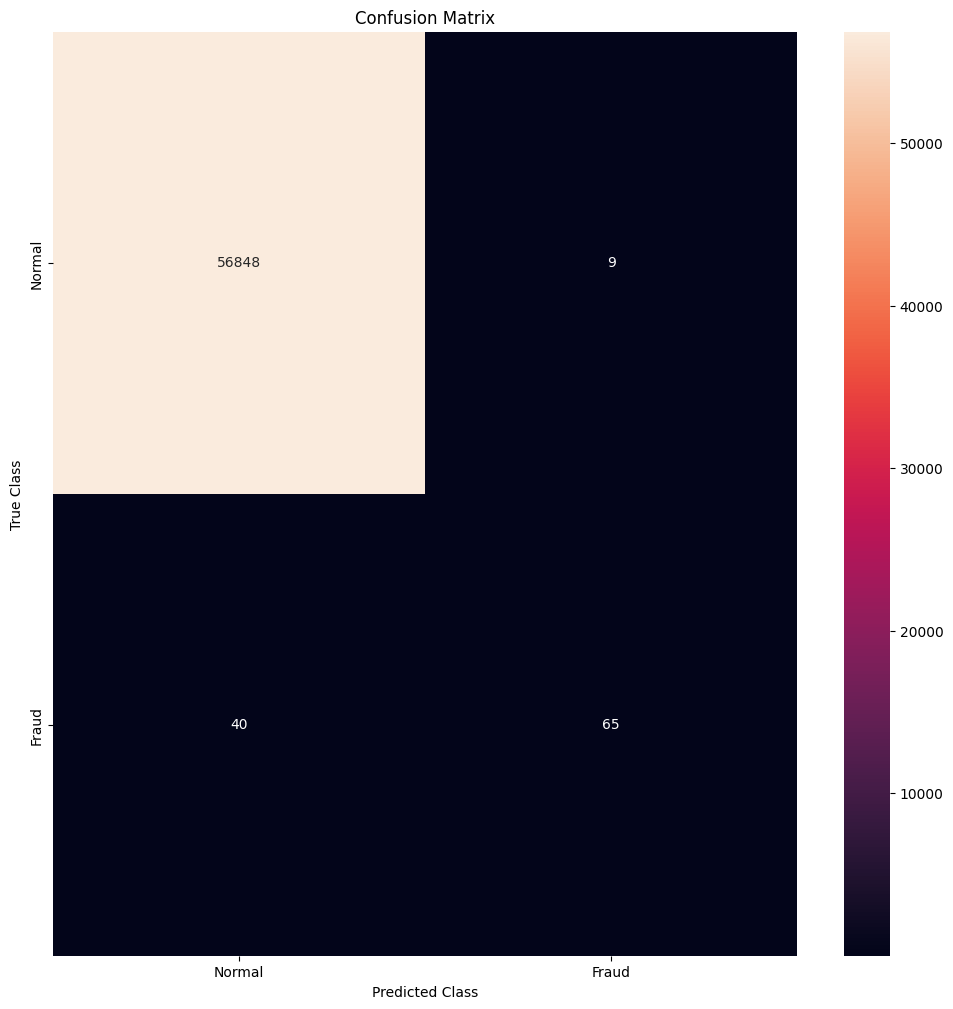

In [63]:
#Confusion Matrix
lbls= ['Normal', 'Fraud']
conf_matrix= confusion_matrix(y_test, y2_pred)
plt.figure(figsize= (12,12))
sns.heatmap(conf_matrix, xticklabels=lbls, yticklabels=lbls, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

## **Now, lets scale the features using Standard Scaler**

In [34]:
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [36]:
logisticregsc= LogisticRegression(solver='lbfgs',C=0.1)
#Training the model

logisticregsc.fit(X_train_scaled, y_train)

#Predictions

y3_pred= logisticregsc.predict(X_test_scaled)


In [69]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors= (y3_pred!= y_test).sum()

print("Model: logistic Regression without Scaling")
acclrs= accuracy_score(y_test, y3_pred)
print("Accuracy is {}".format(acclrs))

preclrs= precision_score(y_test, y3_pred)
print("Precision is {}".format(preclrs))

rec= recall_score(y_test, y3_pred)
print("Recall is {}".format(rec))

f1= f1_score(y_test, y3_pred)
print("The F1 Score is {}".format(f1))

MCC= matthews_corrcoef(y_test, y3_pred)
print("Matthews Correlation Coefficient is {}".format(MCC))

Model: logistic Regression without Scaling
Accuracy is 0.9991222218320986
Precision is 0.8666666666666667
Recall is 0.6190476190476191
The F1 Score is 0.7222222222222222
Matthews Correlation Coefficient is 0.7320658089775608


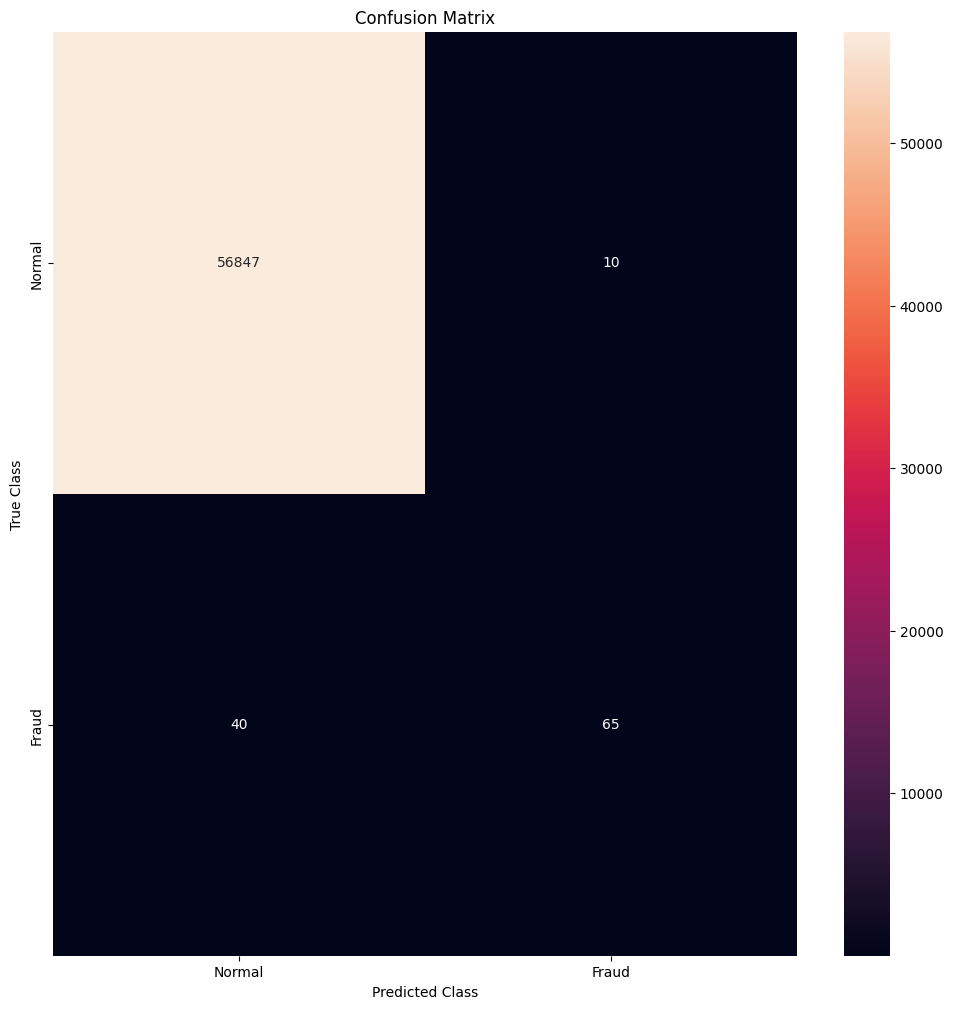

In [50]:
#Confusion Matrix
lbls= ['Normal', 'Fraud']
conf_matrix= confusion_matrix(y_test, y3_pred)
plt.figure(figsize= (12,12))
sns.heatmap(conf_matrix, xticklabels=lbls, yticklabels=lbls, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# **Model 3: Decision Trees**

**1. Interpretability:**

Transparency: Decision Trees provide a clear and interpretable model structure. Each decision is made based on specific feature values, and the path from root to leaf nodes is easy to follow. This transparency helps in understanding the reasoning behind each prediction, which is crucial for fraud detection where understanding the decision-making process is important.

**2. Handling Non-linear Relationships:**
Flexibility: Decision Trees can capture non-linear relationships between features and the target variable without the need for feature transformation or scaling. This flexibility allows them to model complex patterns in the data, which is beneficial for detecting sophisticated fraud schemes.

**3. Feature Importance:**

Insightful: Decision Trees provide insights into feature importance by showing which features are most influential in making predictions. This can help identify key factors contributing to fraudulent transactions and guide further 
feature engineering or investigation.

**4. No Need for Feature Scaling:**

Ease of Use: Decision Trees do not require feature scaling (e.g., normalization or standardization). This simplifies the preprocessing pipeline, making it easier to work with raw data directly.

**5. Ability to Handle Mixed Data Types:**

Versatility: Decision Trees can handle both numerical and categorical features effectively. This is useful in fraud detection where datasets might include diverse types of features, such as transaction amounts (numerical) and merchant categories (categorical).


In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(x_train, y_train)



DecisionTreeClassifier(random_state=42)

In [39]:
ydt_pred=dtree.predict(x_test)

In [71]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors= (ydt_pred!= y_test).sum()

print("Model: logistic Regression without Scaling")
accdt= accuracy_score(y_test, ydt_pred)
print("Accuracy is {}".format(accdt))

precdt= precision_score(y_test, ydt_pred)
print("Precision is {}".format(precdt))

rec= recall_score(y_test, ydt_pred)
print("Recall is {}".format(rec))

f1= f1_score(y_test, ydt_pred)
print("The F1 Score is {}".format(f1))

MCC= matthews_corrcoef(y_test, ydt_pred)
print("Matthews Correlation Coefficient is {}".format(MCC))

Model: logistic Regression without Scaling
Accuracy is 0.9992451107756047
Precision is 0.7924528301886793
Recall is 0.8
The F1 Score is 0.7962085308056872
Matthews Correlation Coefficient is 0.7958393653831811


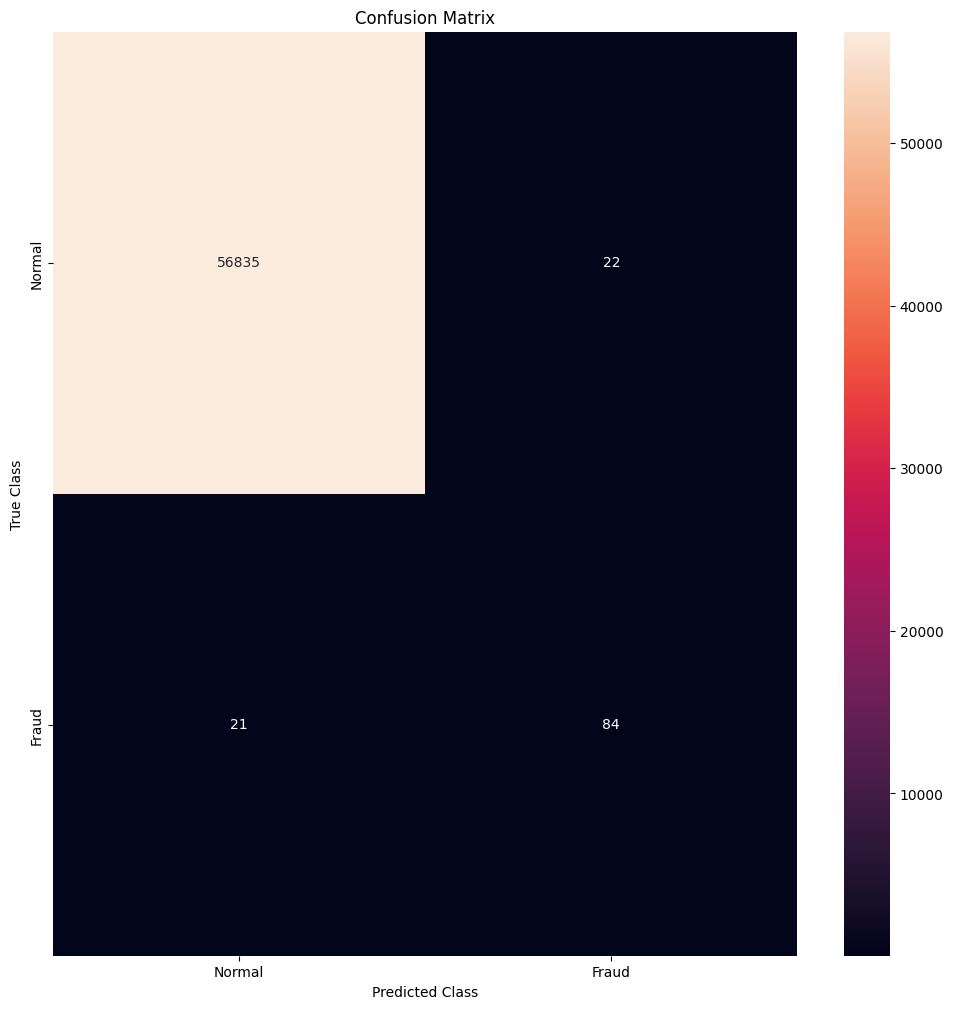

In [51]:
#Confusion Matrix
lbls= ['Normal', 'Fraud']
conf_matrix= confusion_matrix(y_test, ydt_pred)
plt.figure(figsize= (12,12))
sns.heatmap(conf_matrix, xticklabels=lbls, yticklabels=lbls, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# **Model 4: Gradient Boosting Classifier**
Gradient Boosting Classifier is an ensemble learning technique that builds a model in a stage-wise manner by combining the predictions of several weak learners (typically decision trees) to form a strong predictive model. It operates by iteratively fitting new models to the residual errors of the previous models and adjusting the predictions to improve overall performance.



In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Train the model
gbc.fit(x_train, y_train)

#Predictions

ygbc_predict= gbc.predict(x_test)


In [72]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers= len(fraud)
n_errors= (ygbc_predict!= y_test).sum()

print("Model: logistic Regression without Scaling")
accgbc= accuracy_score(y_test, ygbc_predict)
print("Accuracy is {}".format(accgbc))

precgbc= precision_score(y_test, ygbc_predict)
print("Precision is {}".format(precgbc))

rec= recall_score(y_test, ygbc_predict)
print("Recall is {}".format(rec))

f1= f1_score(y_test, ygbc_predict)
print("The F1 Score is {}".format(f1))

MCC= matthews_corrcoef(y_test, ygbc_predict)
print("Matthews Correlation Coefficient is {}".format(MCC))

Model: logistic Regression without Scaling
Accuracy is 0.9989466661985184
Precision is 0.8169014084507042
Recall is 0.5523809523809524
The F1 Score is 0.6590909090909091
Matthews Correlation Coefficient is 0.6712658510503717


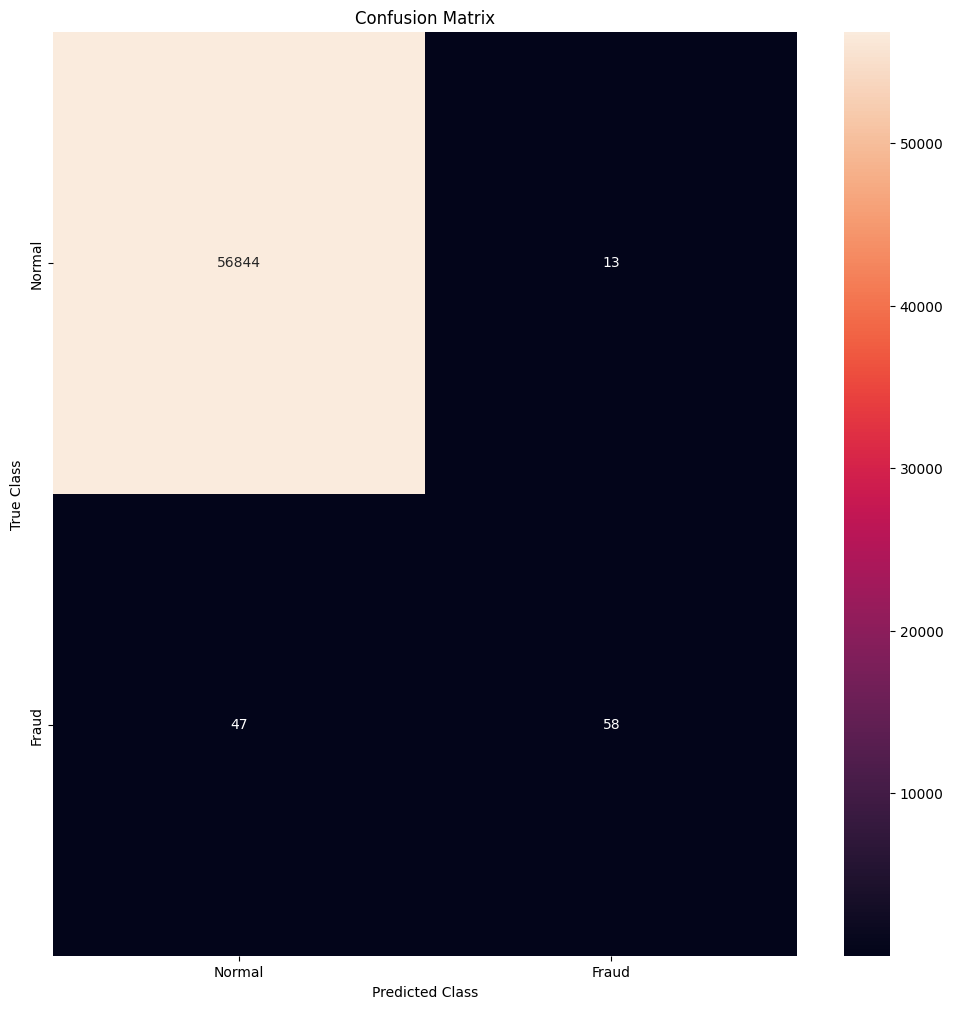

In [53]:
#Confusion Matrix
lbls= ['Normal', 'Fraud']
conf_matrix= confusion_matrix(y_test, ygbc_predict)
plt.figure(figsize= (12,12))
sns.heatmap(conf_matrix, xticklabels=lbls, yticklabels=lbls, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

### **Predicting for a new tuple of data**

In [78]:
new_tuple = [0, -1.359807, -0.072781, 2.536347, 1.378155, -0.338321, 0.462388, 0.239599, 0.098698, 0.363787, 0.090794, -0.551600, -0.617801, -0.991390, -0.311169, 1.468177, -0.470401, 0.207971, 0.025791, 0.403993, 0.251412, -0.018307, 0.277838, -0.110474, 0.066928, 0.128539, -0.189115, 0.133558, 2.0, 10.11]
new_data = np.array(new_tuple).reshape(1, -1)
new_pred= rfc.predict(new_data)
print("RFM", new_pred)
new_predlog= logisticreg.predict(new_data)
print("LogisticRegression", new_predlog)
new_preddt= dtree.predict(new_data)
print("Decision Tree", new_preddt)
new_predictgbc= gbc.predict(new_data)
print("GradientBoostingClassifier", new_predictgbc)

RFM [0]
LogisticRegression [0]
Decision Tree [0]
GradientBoostingClassifier [0]


All the models are giving valid for the new tuple of data.

## **Accuracy and Precision Comparision between the Models**
Lets compare the accuracy and prediction of the models in a table data frame.

In [76]:
models= ["Random Forest", "Logistic Regression", "Logistc Regression Scaled", "Decision Trees", "Gradient Boosting Classifier"]
accuracy= [accrf, acclr,acclrs,accdt, accgbc]
precision= [precrf, preclr, preclrs, precdt, precgbc]

repr= {
    'Models': models,
    'Accuracy': accuracy,
    'Precision': precision}
df1= pd.DataFrame(repr)

df1.set_index('Models', inplace=True)

print(df1)

                              Accuracy  Precision
Models                                           
Random Forest                 0.999544   0.943820
Logistic Regression           0.999140   0.878378
Logistc Regression Scaled     0.999122   0.866667
Decision Trees                0.999245   0.792453
Gradient Boosting Classifier  0.998947   0.816901


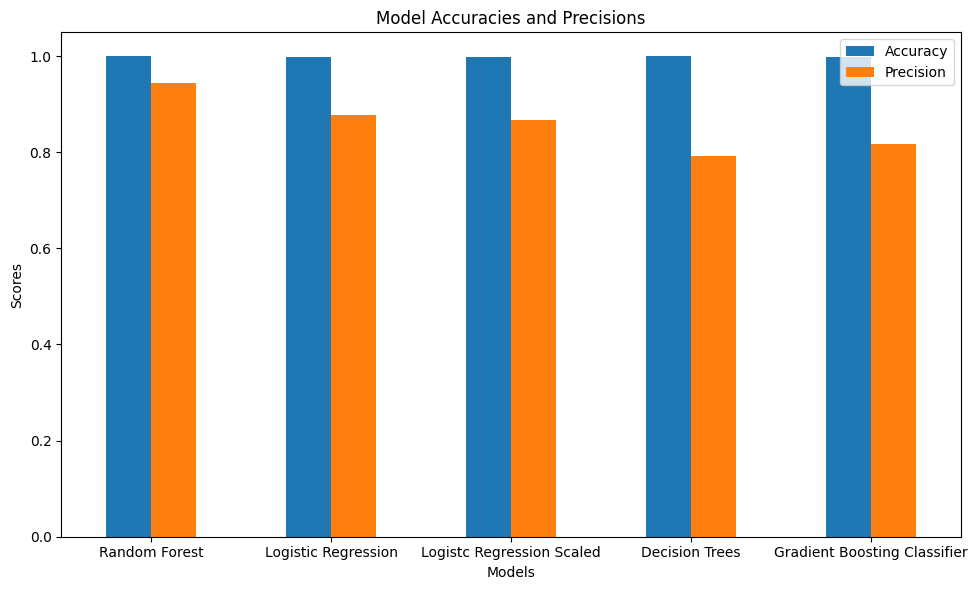

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

df1.plot(kind='bar', ax=ax)
ax.set_title('Model Accuracies and Precisions')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

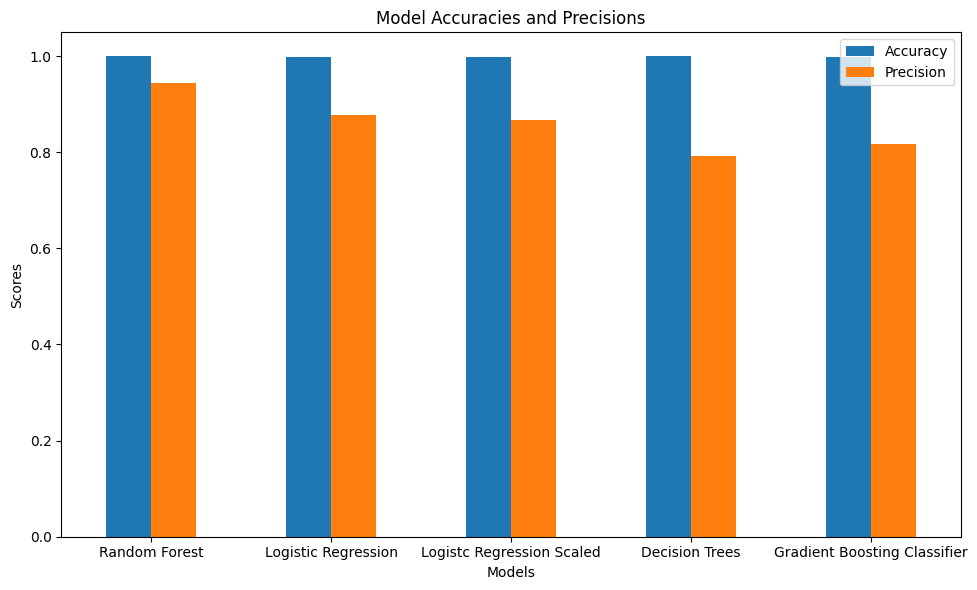

# **Conclusion**

From the above comparison and graph, we can conclude that the Random Forest Model performs best on the given data set to predict the target value of Credit Card Fraud Detection